In [19]:
import geopandas as gpd

In [20]:
from census import Census
import pandas as pd

c = Census("c1cb4bbf855e831cf5e6a023ebbaac12623e1fb8")

In [21]:
state_fips = '13'
county_fips_codes = ['063', '067', '089', '121', '135']
variables = [
    'B01003_001E',  # Total Population
    'B19013_001E',  # Median Household Income
    'B25077_001E',  # Median Housing Value
    # Add other variables as needed
]

In [22]:
import os
os.getcwd()
os.chdir(r'C:\Users\Hojung Yu\Desktop\Geovisualization_Final')

In [38]:
# os.environ["OGR_GEOMETRY_ACCEPT_UNCLOSED_RING"] = "YES"
# os.environ['USE_PYGEOS'] = '0'
from shapely.geometry import Polygon

tot_spen = gpd.read_file("repaired.shp")

tot_spen['Geograph'].head(5)
tot_spen_2 = tot_spen['Geograph'].str.split(', ', expand = True)
tot_spen = pd.concat([tot_spen, tot_spen_2], axis = 1)
print(tot_spen.head())


                      Geograph         FIPS   Estimate MoE__Tot  \
0      Census Tract 1, Alabama  01111000100   55355.15     None   
1      Census Tract 1, Georgia  13121000100  196582.52     None   
2      Census Tract 1, Georgia  13059000100   38964.68     None   
3  Census Tract 10.01, Georgia  13121001001  124573.25     None   
4  Census Tract 10.02, Georgia  13121001002   52050.89     None   

                                            geometry                   0  \
0  POLYGON ((-9534307.727 3943066.235, -9534265.5...      Census Tract 1   
1  POLYGON ((-9391732.913 4002708.326, -9391703.5...      Census Tract 1   
2  POLYGON ((-9282278.438 4023505.214, -9282194.6...      Census Tract 1   
3  POLYGON ((-9395261.074 3999629.048, -9395257.2...  Census Tract 10.01   
4  POLYGON ((-9396809.64 3999290.87, -9396748.859...  Census Tract 10.02   

         1  
0  Alabama  
1  Georgia  
2  Georgia  
3  Georgia  
4  Georgia  


In [39]:
tot_spen['FIPS'] = tot_spen['FIPS'].astype(str)

# Split FIPS into separate columns using slicing
tot_spen['State_FIPS'] = tot_spen['FIPS'].str[:2]    # First 2 digits for State
tot_spen['County_FIPS'] = tot_spen['FIPS'].str[2:5]  # Next 3 digits for County
tot_spen['Tract_FIPS'] = tot_spen['FIPS'].str[5:]    # Last 6 digits for Census Tract

# Display the updated DataFrame
tot_spen

,Geograph,FIPS,Estimate,MoE__Tot,geometry,0,1,State_FIPS,County_FIPS,Tract_FIPS
0,"Census Tract 1, Alabama",01111000100,55355.15,None,"POLYGON ((-9534307.727 3943066.235, -9534265.5...",Census Tract 1,Alabama,01,111,000100
1,"Census Tract 1, Georgia",13121000100,196582.52,None,"POLYGON ((-9391732.913 4002708.326, -9391703.5...",Census Tract 1,Georgia,13,121,000100
2,"Census Tract 1, Georgia",13059000100,38964.68,None,"POLYGON ((-9282278.438 4023505.214, -9282194.6...",Census Tract 1,Georgia,13,059,000100
3,"Census Tract 10.01, Georgia",13121001001,124573.25,None,"POLYGON ((-9395261.074 3999629.048, -9395257.2...",Census Tract 10.01,Georgia,13,121,001001
4,"Census Tract 10.02, Georgia",13121001002,52050.89,None,"POLYGON ((-9396809.64 3999290.87, -9396748.859...",Census Tract 10.02,Georgia,13,121,001002
...,...,...,...,...,...,...,...,...,...,...
1539,"Census Tract 98.04, Georgia",13121009804,267390.43,None,"POLYGON ((-9398650.42 4007147.864, -9398619.80...",Census Tract 98.04,Georgia,13,121,009804
1540,"Census Tract 9800, Georgia",13121980000,0.00,None,"MULTIPOLYGON (((-9401268.653 3980790.812, -940...",Census Tract 9800,Georgia,13,121,980000
1541,"Census Tract 9800, Georgia",13063980000,0.00,None,"POLYGON ((-9401869.668 3978026.603, -9401864.5...",Census Tract 9800,Georgia,13,063,980000
1542,"Census Tract 9800, Georgia",13089980000,0.00,None,"POLYGON ((-9385316.9 3994647.935, -9385172.63 ...",Census Tract 9800,Georgia,13,089,980000


In [40]:
filtered_tot_spen = tot_spen[tot_spen['County_FIPS'].isin(county_fips_codes)]
filtered_tot_spen = filtered_tot_spen[['FIPS','County_FIPS', 0,  'Tract_FIPS', 'geometry','Estimate']]
filtered_tot_spen = filtered_tot_spen.rename(columns={
    'FIPS': 'FIPS',
    0: 'tract',
    'Estimate': 'tot_spen',
    'geometry': 'geometry',
    'County_FIPS': 'County_FIPS',
    'Tract_FIPS': 'Tract_FIPS'
})
print(filtered_tot_spen.head())

          FIPS County_FIPS                tract Tract_FIPS  \
1  13121000100         121       Census Tract 1     000100   
3  13121001001         121   Census Tract 10.01     001001   
4  13121001002         121   Census Tract 10.02     001002   
5  13121010003         121  Census Tract 100.03     010003   
6  13121010004         121  Census Tract 100.04     010004   

                                            geometry   tot_spen  
1  POLYGON ((-9391732.913 4002708.326, -9391703.5...  196582.52  
3  POLYGON ((-9395261.074 3999629.048, -9395257.2...  124573.25  
4  POLYGON ((-9396809.64 3999290.87, -9396748.859...   52050.89  
5  POLYGON ((-9393436.102 4009272.972, -9393435.3...  145983.70  
6  POLYGON ((-9393259.994 4011177.66, -9393258.10...  258645.11  


In [41]:
df_ex = filtered_tot_spen
df_ex.head()

,FIPS,County_FIPS,tract,Tract_FIPS,geometry,tot_spen
1,13121000100,121,Census Tract 1,000100,"POLYGON ((-9391732.913 4002708.326, -9391703.5...",196582.52
3,13121001001,121,Census Tract 10.01,001001,"POLYGON ((-9395261.074 3999629.048, -9395257.2...",124573.25
4,13121001002,121,Census Tract 10.02,001002,"POLYGON ((-9396809.64 3999290.87, -9396748.859...",52050.89
5,13121010003,121,Census Tract 100.03,010003,"POLYGON ((-9393436.102 4009272.972, -9393435.3...",145983.70
6,13121010004,121,Census Tract 100.04,010004,"POLYGON ((-9393259.994 4011177.66, -9393258.10...",258645.11


In [ ]:

folder_names = ['Alcohol', 'Apparel', 'Babysitting', 'Child_Care', 'DayCare_Nursery', 'Dining_out', 'Education', 'Entertainment', 
                'Food_Consumed_athome', 'Health_Care','Highschooldegree','Homeownershiprate','Household_Services','Housing',
                'insurance','LocalTransportation','Median_Income','MedianAge',
                'PensionsandSocialSecurity','Percent_Foreign_born','Travel']
for name in folder_names:
    file_path = os.path.join(".\\", name, "MapData.shp")
    if os.path.exists(file_path):
        df_new = gpd.read_file(file_path, ignore_geometry=True)
        df_new = df_new[['FIPS','Estimate']]
        df_new = df_new.rename(columns = {'Estimate': name})
        df_ex = df_ex.merge(df_new, how = 'left', on = 'FIPS')
    else:
        print(f"Warning: {file_path} does not exist")

df_ex


    

,FIPS,County_FIPS,tract,Tract_FIPS,geometry,tot_spen,Alcohol,Apparel,Babysitting,Child_Care,...,Homeownershiprate,Household_Services,Housing,insurance,LocalTransportation,Median_Income,MedianAge,PensionsandSocialSecurity,Percent_Foreign_born,Travel
0,13121000100,121,Census Tract 1,000100,"POLYGON ((-9391732.913 4002708.326, -9391703.5...",196582.52,1589.03,4581.34,381.01,1195.45,...,62.9,5622.59,67248.05,1445.98,19573.49,154808.0,44.8,21972.22,8.8,5187.25
1,13121001001,121,Census Tract 10.01,001001,"POLYGON ((-9395261.074 3999629.048, -9395257.2...",124573.25,998.72,3288.75,233.77,782.69,...,31.9,3270.33,42920.70,702.91,13941.31,100278.0,25.5,13439.41,31.4,2975.96
2,13121001002,121,Census Tract 10.02,001002,"POLYGON ((-9396809.64 3999290.87, -9396748.859...",52050.89,391.28,1422.32,73.76,236.79,...,1.2,1261.67,18212.67,257.18,6207.83,43938.0,20.4,5000.28,16.5,1162.70
3,13121010003,121,Census Tract 100.03,010003,"POLYGON ((-9393436.102 4009272.972, -9393435.3...",145983.70,1193.99,3785.83,318.73,944.19,...,65.9,3998.61,49784.44,983.77,14998.93,137723.0,32.5,16260.61,17.7,3626.06
4,13121010004,121,Census Tract 100.04,010004,"POLYGON ((-9393259.994 4011177.66, -9393258.10...",258645.11,2087.56,6043.47,502.06,1571.85,...,97.0,7443.58,87514.02,2011.30,25577.53,241607.0,38.6,29222.27,14.4,6846.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,13121009804,121,Census Tract 98.04,009804,"POLYGON ((-9398650.42 4007147.864, -9398619.80...",267390.43,2144.60,6325.77,486.24,1527.48,...,96.8,7650.35,89462.28,2184.07,26599.28,NaN,36.0,29563.02,4.6,6867.60
1002,13121980000,121,Census Tract 9800,980000,"MULTIPOLYGON (((-9401268.653 3980790.812, -940...",0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.0,0.00
1003,13063980000,063,Census Tract 9800,980000,"POLYGON ((-9401869.668 3978026.603, -9401864.5...",0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.0,0.00
1004,13089980000,089,Census Tract 9800,980000,"POLYGON ((-9385316.9 3994647.935, -9385172.63 ...",0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.0,0.00


In [ ]:
df_normalized = df_ex.drop(index = [1002, 1003, 1004])

KeyError: '[1540, 1541, 1542] not found in axis'

In [ ]:
columns_to_normalize = ['Alcohol', 'Apparel', 'Babysitting', 'Child_Care', 'DayCare_Nursery', 'Dining_out', 'Education', 'Entertainment', 
                'Food_Consumed_athome', 'Health_Care','Household_Services','Housing',
                'insurance','LocalTransportation',
                'PensionsandSocialSecurity','Travel']
for column in columns_to_normalize:
    df_normalized[column] =  df_normalized[column] / df_normalized['tot_spen'] * 100

df_normalized.head()

KeyError: 'Alcohol'

<Axes: >

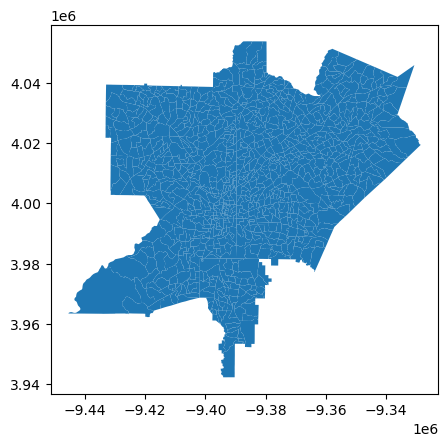

In [ ]:
import matplotlib.pyplot as plt
df_normalized.plot()

In [ ]:
df_ex.to_file("dataset_normalized3.shp")

C:\Users\Hojung Yu\AppData\Local\Temp\ipykernel_22120\1502098822.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_ex.to_file("dataset_normalized3.shp")
c:\Users\Hojung Yu\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'County_FIPS' to 'County_FIP'
  ogr_write(
c:\Users\Hojung Yu\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Babysitting' to 'Babysittin'
  ogr_write(
c:\Users\Hojung Yu\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'DayCare_Nursery' to 'DayCare_Nu'
  ogr_write(
c:\Users\Hojung Yu\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Entertainment' to 'Entertainm'
  ogr_write(
c:\Users\Hojung Yu\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Food_Consumed_athome' to 'F